# Fraud Detection - Exploratory Data Analysis

This notebook explores the credit card transaction dataset to understand:
- Data structure and quality
- Class imbalance (fraud vs legitimate)
- Feature distributions and patterns
- Temporal and geographic trends

**Dataset:** Kaggle Credit Card Fraud Detection (simulated)

## 1. Setup & Data Loading

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

# Plot settings
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

# Paths
DATA_DIR = Path('../data/interim')
FIGURES_DIR = Path('../outputs/figures')
FIGURES_DIR.mkdir(parents=True, exist_ok=True)

## 2. Initial Exploration

In [99]:
# Column names and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 29 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               category      
 3   category               category      
 4   amt                    float64       
 5   first                  string        
 6   last                   string        
 7   gender                 category      
 8   street                 string        
 9   city                   string        
 10  state                  category      
 11  zip                    int64         
 12  lat                    float64       
 13  long                   float64       
 14  city_pop               int64         
 15  job                    string        
 16  dob                    datetime64[ns]
 17  trans_num              string        
 18  unix_time             

In [100]:
# Drop index column if exists
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
    print("Dropped 'Unnamed: 0' index column")

# Convert to correct dtypes
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

# Categorical columns
for col in ['merchant', 'category', 'gender', 'state']:
    df[col] = df[col].astype('category')

# String columns
for col in ['first', 'last', 'street', 'city', 'job', 'trans_num']:
    df[col] = df[col].astype('string')


In [101]:
# First few rows
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_lat,merch_long,is_fraud,trans_datetime,trans_hour,trans_day,trans_month,trans_dayofweek,trans_year,distance
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.011293,-82.048315,0,2019-01-01 00:00:18,0,1,1,1,2019,0.872830
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,49.159047,-118.186462,0,2019-01-01 00:00:44,0,1,1,1,2019,0.272310
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,43.150704,-112.154481,0,2019-01-01 00:00:51,0,1,1,1,2019,0.975845
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,47.034331,-112.561071,0,2019-01-01 00:01:16,0,1,1,1,2019,0.919802
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.674999,-78.632459,0,2019-01-01 00:03:06,0,1,1,1,2019,0.868505


In [102]:
# Statistical summary (numerical columns only)
df.select_dtypes(include=['int64', 'float64']).describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,distance
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03,7.656171e-01
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02,2.847429e-01
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00,2.386629e-04
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00,5.648189e-01
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00,7.982886e-01
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00,9.773826e-01
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00,1.413364e+00


In [103]:
# Column list with dtypes
pd.DataFrame({
    'dtype': df.dtypes,
    'non_null': df.count(),
    'null_count': df.isnull().sum(),
    'unique': df.nunique()
})

,dtype,non_null,null_count,unique
trans_date_trans_time,datetime64[ns],1852394,0,1819551
cc_num,int64,1852394,0,999
merchant,category,1852394,0,693
category,category,1852394,0,14
amt,float64,1852394,0,60616
first,string[python],1852394,0,355
last,string[python],1852394,0,486
gender,category,1852394,0,2
street,string[python],1852394,0,999
city,string[python],1852394,0,906


## 3. Data Quality

In [104]:
# Missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'missing_count': missing,
    'missing_pct': missing_pct
}).sort_values('missing_count', ascending=False)

print("Missing Values:")
print(missing_df[missing_df['missing_count'] > 0])

if missing.sum() == 0:
    print("No missing values found!")

Missing Values:
Empty DataFrame
Columns: [missing_count, missing_pct]
Index: []
No missing values found!


In [105]:
# Missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'missing_count': missing,
    'missing_pct': missing_pct
}).sort_values('missing_count', ascending=False)

print("Missing Values:")
print(missing_df[missing_df['missing_count'] > 0])

if missing.sum() == 0:
    print("No missing values found!")

# Check for zeros/suspicious values in numerical columns
print("\n" + "="*50)
print("Zero Value Check (numerical columns):")
print("="*50)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    zero_count = (df[col] == 0).sum()
    zero_pct = zero_count / len(df) * 100
    if zero_pct > 0:
        print(f"{col}: {zero_count:,} zeros ({zero_pct:.2f}%)")

# Check for negative values
print("\n" + "="*50)
print("Negative Value Check:")
print("="*50)
for col in ['amt', 'city_pop']:
    neg_count = (df[col] < 0).sum()
    if neg_count > 0:
        print(f"{col}: {neg_count:,} negative values")
    else:
        print(f"{col}: No negative values")

Missing Values:
Empty DataFrame
Columns: [missing_count, missing_pct]
Index: []
No missing values found!

Zero Value Check (numerical columns):
is_fraud: 1,842,743 zeros (99.48%)

Negative Value Check:
amt: No negative values
city_pop: No negative values


## 4. Target Analysis (Class Imbalance)

In [106]:
# Fraud distribution
fraud_counts = df['is_fraud'].value_counts()
fraud_pct = df['is_fraud'].value_counts(normalize=True) * 100

print("Class Distribution:")
print(f"  Legitimate (0): {fraud_counts[0]:,} ({fraud_pct[0]:.2f}%)")
print(f"  Fraudulent (1): {fraud_counts[1]:,} ({fraud_pct[1]:.2f}%)")
print(f"\nImbalance Ratio: {fraud_counts[0]/fraud_counts[1]:.0f}:1")

Class Distribution:
  Legitimate (0): 1,842,743 (99.48%)
  Fraudulent (1): 9,651 (0.52%)

Imbalance Ratio: 191:1


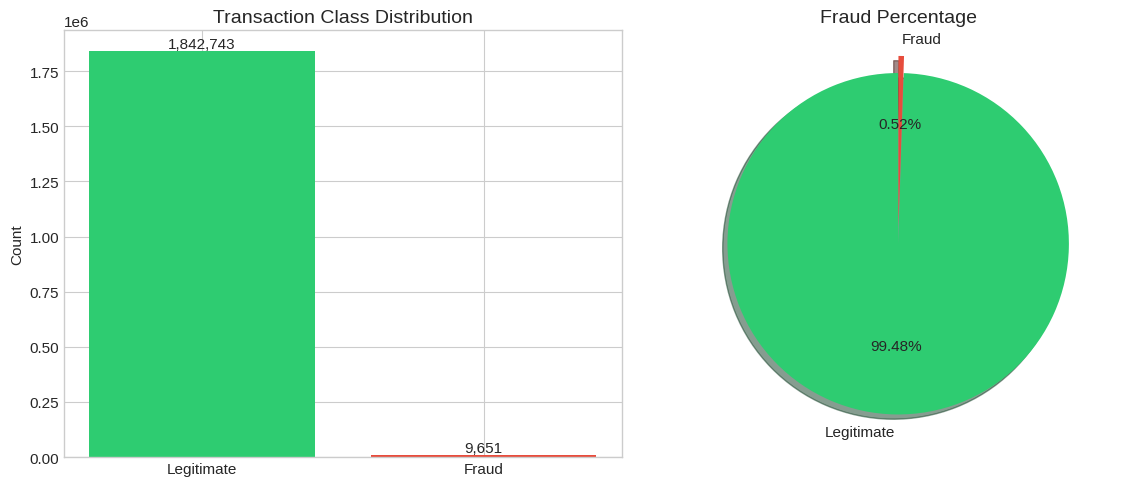

In [107]:
# Visualize class imbalance
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot
colors = ['#2ecc71', '#e74c3c']
bars = axes[0].bar(['Legitimate', 'Fraud'], fraud_counts.values, color=colors)
axes[0].set_title('Transaction Class Distribution', fontsize=14)
axes[0].set_ylabel('Count')
for bar, count in zip(bars, fraud_counts.values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
                 f'{count:,}', ha='center', va='bottom', fontsize=11)

# Pie chart
axes[1].pie(fraud_counts.values, labels=['Legitimate', 'Fraud'],
            autopct='%1.2f%%', colors=colors, explode=[0, 0.1],
            shadow=True, startangle=90)
axes[1].set_title('Fraud Percentage', fontsize=14)

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'class_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

### Findings

**Class distribution:**
- Legitimate: 1,842,743 (99.48%)
- Fraud: 9,651 (0.52%)  
- Ratio: 191:1

**Problem:** A naive model predicting "not fraud" always would get 99.48% accuracy but catch zero frauds.

**What we'll do:**
- Use SMOTE to oversample fraud cases
- Apply class weights during training
- Evaluate with PR-AUC instead of accuracy

## 5. Numerical Features

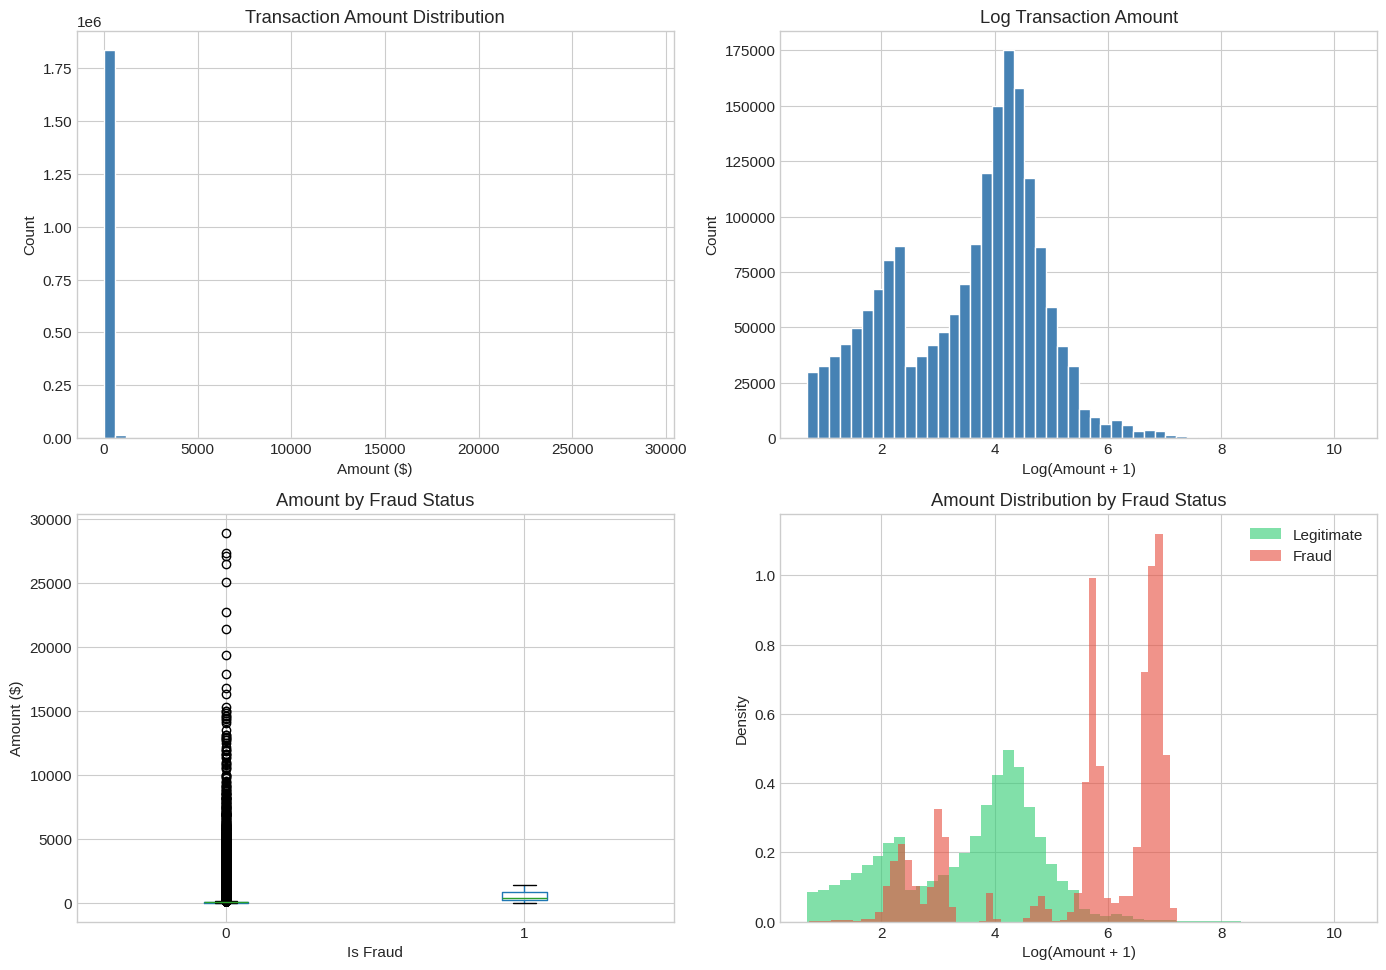

In [108]:
# Transaction amount distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Overall distribution
axes[0, 0].hist(df['amt'], bins=50, color='steelblue', edgecolor='white')
axes[0, 0].set_title('Transaction Amount Distribution')
axes[0, 0].set_xlabel('Amount ($)')
axes[0, 0].set_ylabel('Count')

# Log scale
axes[0, 1].hist(np.log1p(df['amt']), bins=50, color='steelblue', edgecolor='white')
axes[0, 1].set_title('Log Transaction Amount')
axes[0, 1].set_xlabel('Log(Amount + 1)')
axes[0, 1].set_ylabel('Count')

# By fraud status (boxplot)
df.boxplot(column='amt', by='is_fraud', ax=axes[1, 0])
axes[1, 0].set_title('Amount by Fraud Status')
axes[1, 0].set_xlabel('Is Fraud')
axes[1, 0].set_ylabel('Amount ($)')
plt.suptitle('')

# Density by fraud status
for fraud_val, color, label in [(0, '#2ecc71', 'Legitimate'), (1, '#e74c3c', 'Fraud')]:
    subset = df[df['is_fraud'] == fraud_val]['amt']
    axes[1, 1].hist(np.log1p(subset), bins=50, alpha=0.6, color=color, label=label, density=True)
axes[1, 1].set_title('Amount Distribution by Fraud Status')
axes[1, 1].set_xlabel('Log(Amount + 1)')
axes[1, 1].set_ylabel('Density')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'amount_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

In [109]:
# Amount statistics by fraud status
df.groupby('is_fraud')['amt'].describe()

,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,1842743.0,67.651278,153.548108,1.00,9.610,47.24,82.560,28948.90
1,9651.0,530.661412,391.028873,1.06,240.075,390.00,902.365,1376.04


### Findings

**Plots explained:**
- Top-left: Raw amounts are heavily right-skewed (most small, few large)
- Top-right: Log transform makes it more bell-shaped — better for modeling
- Bottom-left: Boxplot shows fraud has much higher median ($390 vs $47)
- Bottom-right: Clear separation between fraud (red) and legitimate (green)

**Stats:**
| | Legitimate | Fraud |
|--|------------|-------|
| Mean | $67 | $530 |
| Median | $47 | $390 |

**Takeaway:** Fraudsters go for medium-large amounts ($200-900). Too small isn't worth it, too large triggers alerts. Amount will be a strong predictor.

## 6. Categorical Features

In [110]:
# Transaction categories
print(f"Number of categories: {df['category'].nunique()}")
print(f"\nCategories:")
print(df['category'].value_counts())

Number of categories: 14

Categories:
category
gas_transport     188029
grocery_pos       176191
home              175460
shopping_pos      166463
kids_pets         161727
shopping_net      139322
entertainment     134118
food_dining       130729
personal_care     130085
health_fitness    122553
misc_pos          114229
misc_net           90654
grocery_net        64878
travel             57956
Name: count, dtype: int64


In [111]:
# Fraud rate by category
category_fraud = df.groupby('category').agg(
    total=('is_fraud', 'count'),
    fraud_count=('is_fraud', 'sum'),
    fraud_rate=('is_fraud', 'mean')
).sort_values('fraud_rate', ascending=False)

category_fraud['fraud_rate_pct'] = category_fraud['fraud_rate'] * 100
print(category_fraud)

                 total  fraud_count  fraud_rate  fraud_rate_pct
category                                                       
shopping_net    139322         2219    0.015927        1.592713
misc_net         90654         1182    0.013039        1.303859
grocery_pos     176191         2228    0.012645        1.264537
shopping_pos    166463         1056    0.006344        0.634375
gas_transport   188029          772    0.004106        0.410575
misc_pos        114229          322    0.002819        0.281890
grocery_net      64878          175    0.002697        0.269737
travel           57956          156    0.002692        0.269170
personal_care   130085          290    0.002229        0.222931
entertainment   134118          292    0.002177        0.217719
kids_pets       161727          304    0.001880        0.187971
food_dining     130729          205    0.001568        0.156813
home            175460          265    0.001510        0.151032
health_fitness  122553          185    0

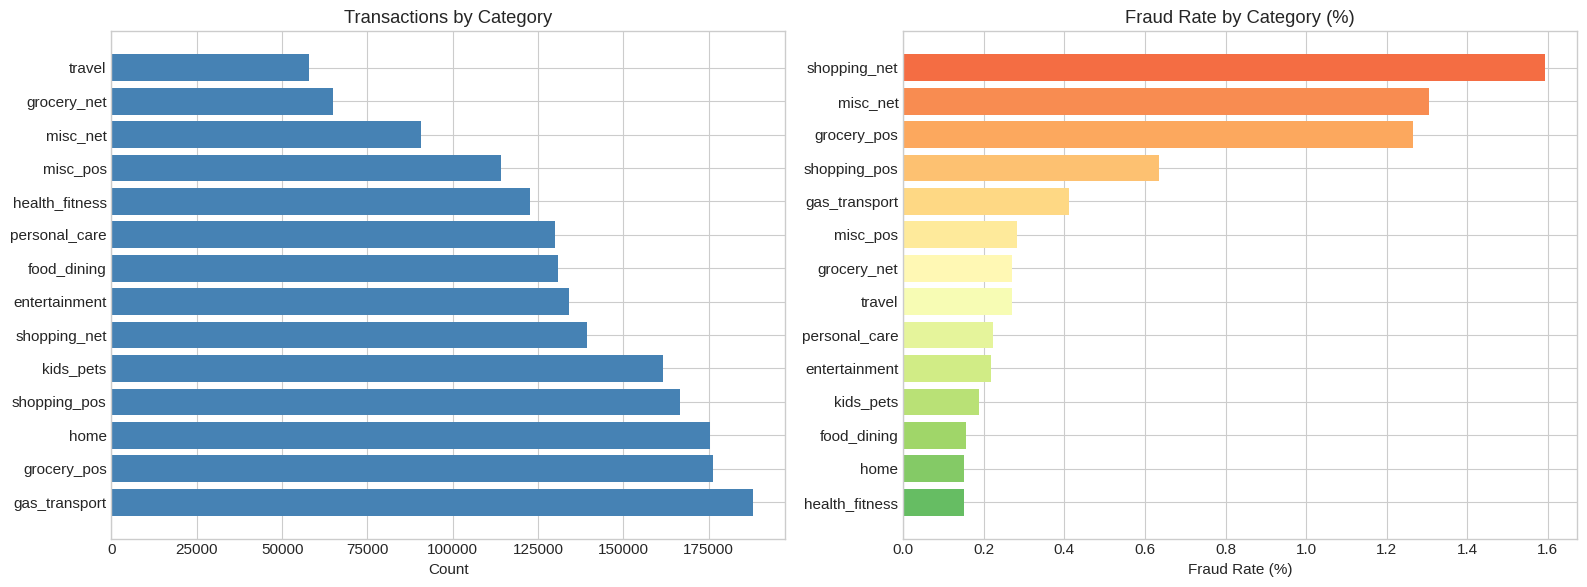

In [112]:
# Visualize fraud rate by category
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Transaction count by category
cat_counts = df['category'].value_counts()
axes[0].barh(cat_counts.index, cat_counts.values, color='steelblue')
axes[0].set_title('Transactions by Category')
axes[0].set_xlabel('Count')

# Fraud rate by category
fraud_rates = category_fraud['fraud_rate_pct'].sort_values(ascending=True)
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(fraud_rates)))
axes[1].barh(fraud_rates.index, fraud_rates.values, color=colors)
axes[1].set_title('Fraud Rate by Category (%)')
axes[1].set_xlabel('Fraud Rate (%)')

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'category_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

### Findings

**High risk categories:**
- shopping_net: 1.59%
- misc_net: 1.30%
- grocery_pos: 1.26%

**Low risk:**
- health_fitness: 0.15%
- home: 0.15%

Online shopping (`_net`) has ~10x higher fraud rate than in-person categories. Makes sense — no physical card verification.

**Gender:** Males slightly higher fraud rate (0.57% vs 0.48%) but not a strong signal.

In [113]:
# Gender distribution
print("Gender Distribution:")
print(df['gender'].value_counts())
print(f"\nFraud rate by gender:")
print(df.groupby('gender')['is_fraud'].mean() * 100)

Gender Distribution:
gender
F    1014749
M     837645
Name: count, dtype: int64

Fraud rate by gender:
gender
F    0.482779
M    0.567305
Name: is_fraud, dtype: float64


## 7. Temporal Patterns

### Findings

**By hour:**
- Night (22:00-03:00): 1.3-2.7% fraud rate
- Day (06:00-21:00): ~0.1% fraud rate
- Fraudsters work when cardholders sleep

**By day:** Wed-Fri slightly higher than Mon/Sun, but not dramatic.

**Monthly:** Fluctuates between 0.2-1.0%, no clear trend up or down.

**Feature idea:** Create `is_night` flag for hours 22-06.

### Findings: Temporal Patterns

**4 Temporal Plots Explained:**

| Plot | Finding |
|------|---------|
| **Transactions by Hour** | Lower volume at night (0-6am ~60K), higher during day (12-23 ~95K) |
| **Fraud Rate by Hour** | Night hours (22:00-03:00) have **1.3-2.7% fraud rate** vs ~0.1% during day |
| **Day of Week** | Wed-Fri slightly higher (~0.65%) than Mon/Sun (~0.4%) |
| **Monthly Trend** | Fluctuates 0.2-1.0%, no clear upward/downward trend over time |

**How Fraud Rate by Hour is computed:**
```python
hourly_fraud = df.groupby('trans_hour')['is_fraud'].mean() * 100
# For each hour: (frauds at that hour / total transactions at that hour) × 100
# Example: Hour 22 has 2.7% fraud rate = very suspicious time
```

**Key Insight:** Fraudsters operate at night when:
- Since cardholders are asleep and won't notice alerts and probably fewer staff monitoring transactions
- **Feature idea:** Create `is_night feature (1 if hour in 22-06, else 0)

## 8. Geographic Analysis

In [114]:
# Calculate distance between customer and merchant
df['distance'] = np.sqrt(
    (df['lat'] - df['merch_lat'])**2 + 
    (df['long'] - df['merch_long'])**2
)

print("Distance statistics:")
print(df['distance'].describe())

Distance statistics:
count    1.852394e+06
mean     7.656171e-01
std      2.847429e-01
min      2.386629e-04
25%      5.648189e-01
50%      7.982886e-01
75%      9.773826e-01
max      1.413364e+00
Name: distance, dtype: float64


### Findings: Geographic Analysis

**Distance Calculation:**
```python
distance = sqrt((customer_lat - merchant_lat)² + (customer_long - merchant_long)²)
# Measures how far customer location is from merchant location (in coordinate degrees)
```

**Distance Statistics:**
| Metric | Legitimate | Fraud |
|--------|------------|-------|
| Mean | 0.766 | 0.767 |
| Median | 0.798 | 0.797 |
| Std | 0.285 | 0.283 |

**Key Insight:** Distance distributions are **nearly identical** for fraud and legitimate transactions.
- The boxplots and density curves overlap almost completely
- **This feature has low predictive power** for fraud detection
- May still keep it, but don't expect it to be important in the model

### Findings

Distance between customer and merchant location shows no difference between fraud and legitimate:
- Fraud mean: 0.767
- Legitimate mean: 0.766

Distributions overlap almost completely. This feature won't help much.

In [115]:
# Distance stats by fraud
print("Distance by fraud status:")
print(df.groupby('is_fraud')['distance'].describe())

Distance by fraud status:


              count      mean       std       min       25%       50%  \
is_fraud                                                                
0         1842743.0  0.765608  0.284752  0.000239  0.564812  0.798297   
1            9651.0  0.767420  0.282917  0.006658  0.565994  0.797028   

               75%       max  
is_fraud                      
0         0.977382  1.413364  
1         0.977389  1.401864  


### Findings: Correlation Analysis

**How to read the correlation matrix:**
- Values range from -1 to +1
- **+1** = perfect positive correlation (as one goes up, other goes up)
- **-1** = perfect negative correlation (as one goes up, other goes down)
- **0** = no relationship

**Correlations with `is_fraud` (target):**
| Feature | Correlation | Interpretation |
|---------|-------------|----------------|
| `amt` | **0.21** | Strongest! Higher amount - more likely fraud |
| `trans_hour` | 0.01 | Weak positive — fraud slightly more at certain hours |
| `distance` | 0.00 | No correlation — distance doesn't predict fraud |
| `city_pop` | 0.00 | No correlation — city size doesn't matter |

**Other correlations:**
- `lat` ↔ `merch_lat` = 0.99 — merchants are near customers (expected, same region)
- `long` ↔ `merch_long` = 1.00 — same reason

**Key Insight:** Transaction amount (`amt`) is the **only numerical feature with meaningful correlation** to fraud. Time features show weak but potentially useful patterns.

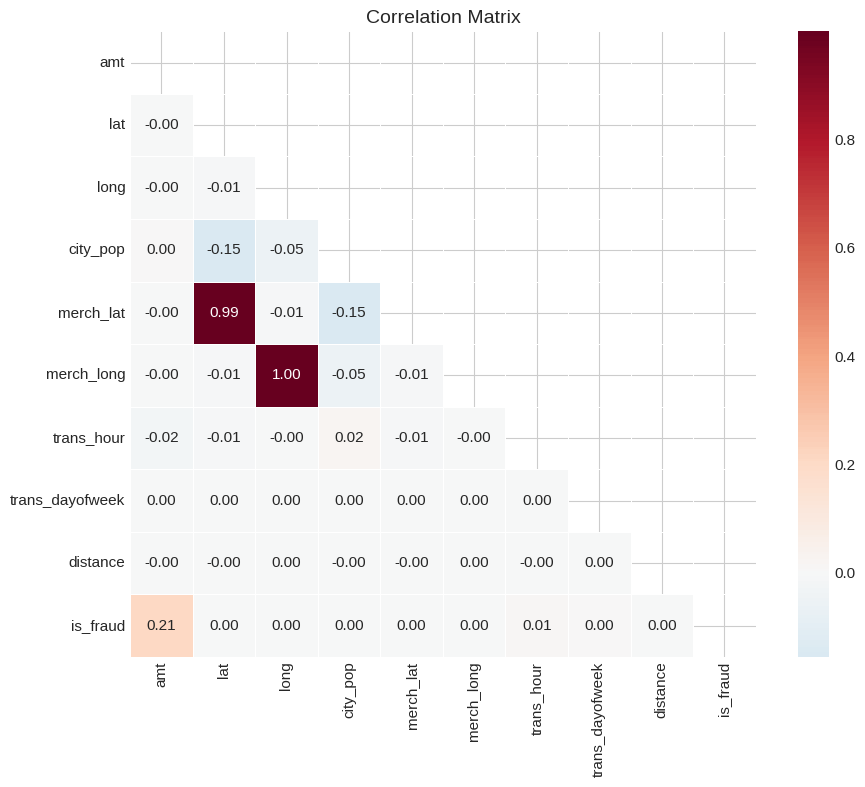

In [116]:
# Numerical columns for correlation
numerical_cols = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 
                  'trans_hour', 'trans_dayofweek', 'distance', 'is_fraud']

corr_matrix = df[numerical_cols].corr()

# Heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
            fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Matrix', fontsize=14)
plt.tight_layout()
plt.savefig(FIGURES_DIR / 'correlation_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

### Findings

**Correlation with fraud:**
- `amt`: 0.21 (strongest — higher amount = more likely fraud)
- `trans_hour`: 0.01 (weak but useful)
- Everything else: ~0 (distance, city_pop don't help)

Only `amt` has meaningful linear correlation. Other useful signals come from categorical patterns (category, hour bins) not linear relationships.

In [117]:
# Correlation with target
target_corr = df[numerical_cols].corr()['is_fraud'].drop('is_fraud').sort_values(key=abs, ascending=False)
print("Correlation with Fraud:")
print(target_corr)

Correlation with Fraud:
amt                0.209308
trans_hour         0.013196
trans_dayofweek    0.004562
lat                0.002904
merch_lat          0.002778
long               0.001022
merch_long         0.000999
distance           0.000458
city_pop           0.000325
Name: is_fraud, dtype: float64


### Summary

**Data:** 1.85M transactions, 22 features, clean (no missing values)

**Key findings:**
1. Severe imbalance (0.52% fraud) — need SMOTE + PR-AUC
2. Fraud amounts are 8x higher than legitimate
3. Online categories (`_net`) are 10x riskier
4. Night hours have 5x higher fraud rate
5. Distance/city_pop are useless

**Features to create:**
- `log_amt` — log transform
- `is_night` — 1 if hour in [22,23,0,1,2,3]
- `is_online` — 1 if category ends with `_net`
- `age` — from dob

### Final Summary: What We Learned

**Dataset Overview:**
- 1.85M transactions over 2 years (2019-2020)
- 22 features after cleaning
- No missing values, clean data

**Critical Finding: Class Imbalance**
- Only 0.52% fraud (9,651 out of 1.85M)
- Must use SMOTE + PR-AUC metric

**Most Predictive Features:**

| Feature | Why it matters |
|---------|----------------|
| `amt` (amount) | Fraud avg $530 vs legitimate $68 — strongest signal |
| `category` | Online shopping 10x riskier than health/fitness |
| `trans_hour` | Night hours (22-03) have 5x higher fraud rate |

**Weak/Useless Features:**
- `distance` — no difference between fraud and legitimate
- `city_pop` — no correlation with fraud
- `gender` — minimal difference (0.57% vs 0.48%)

**Feature Engineering Ideas for Next Notebook:**
1. `log_amt` — log transform of amount
2. `is_night` — 1 if hour in [22, 23, 0, 1, 2, 3], else 0
3. `is_online` — 1 if category ends with `_net`, else 0
4. `category_fraud_rate` — historical fraud rate per category
5. `age` — calculate from `dob`